IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

d:\GitHub\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
df_1=df_1.drop_duplicates()
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...    amp2(C13)  \
0            96.0    3.596543    3.414090 -0.014483  ...  1316

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      13.0 -0.038699   0.027152    1.488048   0.169041         73.0   
1      74.0 -0.049007   0.016068   -0.482525   0.135766        104.0   
2      72.0 -0.065348   0.010794    0.518673   0.122631          0.0   
3      51.0 -0.063153   0.011140    0.432733   0.122884          0.0   
4      24.0 -0.138179   0.033012   -0.759392   0.228073          0.0   
...     ...       ...        ...         ...        ...          ...   
1344    9.0  0.027872   0.048287    3.130020   0.221200         69.0   
1345   15.0 -0.021492   0.019263    0.005730   0.140259         97.0   
1346    1.0 -0.141375   0.034725   -0.867272   0.233694         99.0   
1347   89.0 -0.052601   0.025284   -0.904218   0.167314          0.0   
1348   49.0  0.002605   0.007344   -0.380613   0.085628          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...    amp2(C13)  \
0            96.0    7.968984    4.384530 -0.015220  ...  2620

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.038699   0.027152    1.488048   0.169041         73.0         96.0   
1    -0.049007   0.016068   -0.482525   0.135766        104.0         90.0   
2    -0.065348   0.010794    0.518673   0.122631          0.0         86.0   
3    -0.063153   0.011140    0.432733   0.122884          0.0         68.0   
4    -0.138179   0.033012   -0.759392   0.228073          0.0        102.0   
...        ...        ...         ...        ...          ...          ...   
1344  0.027872   0.048287    3.130020   0.221200         69.0         68.0   
1345 -0.021492   0.019263    0.005730   0.140259         97.0         74.0   
1346 -0.141375   0.034725   -0.867272   0.233694         99.0         93.0   
1347 -0.052601   0.025284   -0.904218   0.167314          0.0         77.0   
1348  0.002605   0.007344   -0.380613   0.085628          0.0        107.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...    amp2(

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index([], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(C13)', '<>(C14)', 'var(C14)', 'kurt(C14)', 'RMS(C14)',
       'freq1(C14)', 'freq2(C14)', 'amp1(C14)', 'amp2(C14)', 'Guasto'],
      dtype='object', length=121)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.045077   0.009986    0.444593   0.109499          0.0         74.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...   amp2(C13)  \
340    5.840557    4.736788  0.047661   0.004911  ...  737.066779   

         <>(C14)     var(C14)  kurt(C14)     RMS(C14)  freq1(C14)  freq2(C14)  \
340  1563.150685  5921.073386   0.324049  1565.038311       123.0       126.0   

      amp1(C14)   amp2(C14)  Guasto  
340  661.231609  638.248699       0  

[1 rows x 121 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.038699   0.027152    1.488048   0.169041         73.0         96.0   
1    -0.049007   0.016068   -0.482525   0.135766        104.0         90.0   
2    -0.065348   0.010794    0.518673   0.122631          0.0         86.0   
3    -0.063153   0.011140    0.432733   0.122884          0.0         68.0   
4    -0.138179   0.033012   -0.759392   0.228073          0.0        102.0   
...        ...        ...         ...        ...          ...          ...   
1344  0.027872   0.048287    3.130020   0.221200         69.0         68.0   
1345 -0.021492   0.019263    0.005730   0.140259         97.0         74.0   
1346 -0.141375   0.034725   -0.867272   0.233694         99.0         93.0   
1347 -0.052601   0.025284   -0.904218   0.167314          0.0         77.0   
1348  0.002605   0.007344   -0.380613   0.085628          0.0        107.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...    amp2(

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
'''oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)'''

'oversample = SMOTE()\nx, y = oversample.fit_resample(x,y)\nprint(x)'

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=15)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=15, score_func=<function f_regression at 0x000001F3C8413CE0>)
[False False False False False False False False  True  True False  True
  True False  True False False False False False False False  True False
 False False False False  True False  True False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True False False False False
 False False False False False False False False False False False False
 False False  True False False False False  True False False False False
 False False  True False False False False False False False False False]


In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

    Input_Features   F_Score
34      kurt(AccY)  4.510550
28     freq1(AccX)  3.149615
12     freq1(GyrY)  3.082551
78        amp1(C9)  2.783099
11       RMS(GyrY)  2.332815
9        var(GyrY)  2.179721
14      amp1(GyrY)  2.025319
8         <>(GyrY)  1.961682
32        <>(AccY)  1.808734
79        amp2(C9)  1.804142
22      amp1(GyrZ)  1.480190
103      amp2(C12)  1.403369
110      amp1(C13)  1.299758
98       kurt(C12)  1.281753
30      amp1(AccX)  1.253437
19       RMS(GyrZ)  1.164487
86       amp1(C10)  1.092582
62     amp1(Pitch)  1.035047
17       var(GyrZ)  0.924825
111      amp2(C13)  0.844456
118      amp1(C14)  0.791292
113       var(C14)  0.750808
87       amp2(C10)  0.737918
4      freq1(GyrX)  0.620696
57      var(Pitch)  0.605371
15      amp2(GyrY)  0.553358
35       RMS(AccY)  0.493131
0         <>(GyrX)  0.451387
59      RMS(Pitch)  0.311610
94       amp1(C11)  0.258103
81        var(C10)  0.245681
102      amp1(C12)  0.226860
46      amp1(AccZ)  0.202251
74        kurt

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[0, 1, 2, 3, 4, 5, 6, 7, 10, 13, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  amp1(GyrZ)  \
0    -0.015220   0.008714   0.094455        102.0    4.350544    1.016758   
1     0.006356   0.025680   0.160187          0.0   16.890651    1.650372   
2     0.009198   0.006246   0.079469        112.0    7.647765    1.381500   
3     0.012345   0.006205   0.079638        111.0    5.044291    2.448609   
4     0.009892   0.004211   0.065558         75.0    1.694865    2.303991   
...        ...        ...        ...          ...         ...         ...   
1344 -0.049282   0.040093   0.205937          0.0   38.065923    1.975274   
1345  0.005814   0.004937   0.070409          0.0    4.843431    1.716492   
1346  0.014483   0.004008   0.064859         71.0    1.680502    2.240340   
1347 -0.016284   0.008022   0.090932        120.0   14.395573    1.848071   
1348  0.014771   0.005620   0.076318        111.0    3.585058    0.827784   

      freq1(AccX)  amp1(AccX)  <>(AccY)  kurt(AccY)     amp1(C9)     amp2(C

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  amp1(GyrZ)  \
340  0.047661   0.004911   0.084669         99.0    1.928887    1.497199   

     freq1(AccX)  amp1(AccX)  <>(AccY)  kurt(AccY)    amp1(C9)    amp2(C9)  \
340        114.0   11.496587  0.199719    -0.55508  789.795988  669.227706   

     kurt(C12)   amp2(C12)   amp1(C13)  
340   0.869216  474.761814  908.746924  


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrY)  amp1(GyrZ)  kurt(C12)    amp2(C12)
0    -0.015220    1.016758  -0.508100   969.981472
1     0.006356    1.650372  -0.796703  1087.502466
2     0.009198    1.381500   1.391900   630.167584
3     0.012345    2.448609   1.208271   792.879047
4     0.009892    2.303991   1.721346   592.914133
...        ...         ...        ...          ...
1344 -0.049282    1.975274  -0.376601  1035.013663
1345  0.005814    1.716492  -0.993586  1169.008272
1346  0.014483    2.240340   1.877482   590.040962
1347 -0.016284    1.848071  -0.821309  1030.722698
1348  0.014771    0.827784  -1.424251   840.096829

[1348 rows x 4 columns]


In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrY)  amp1(GyrZ)  kurt(C12)   amp2(C12)
340  0.047661    1.497199   0.869216  474.761814


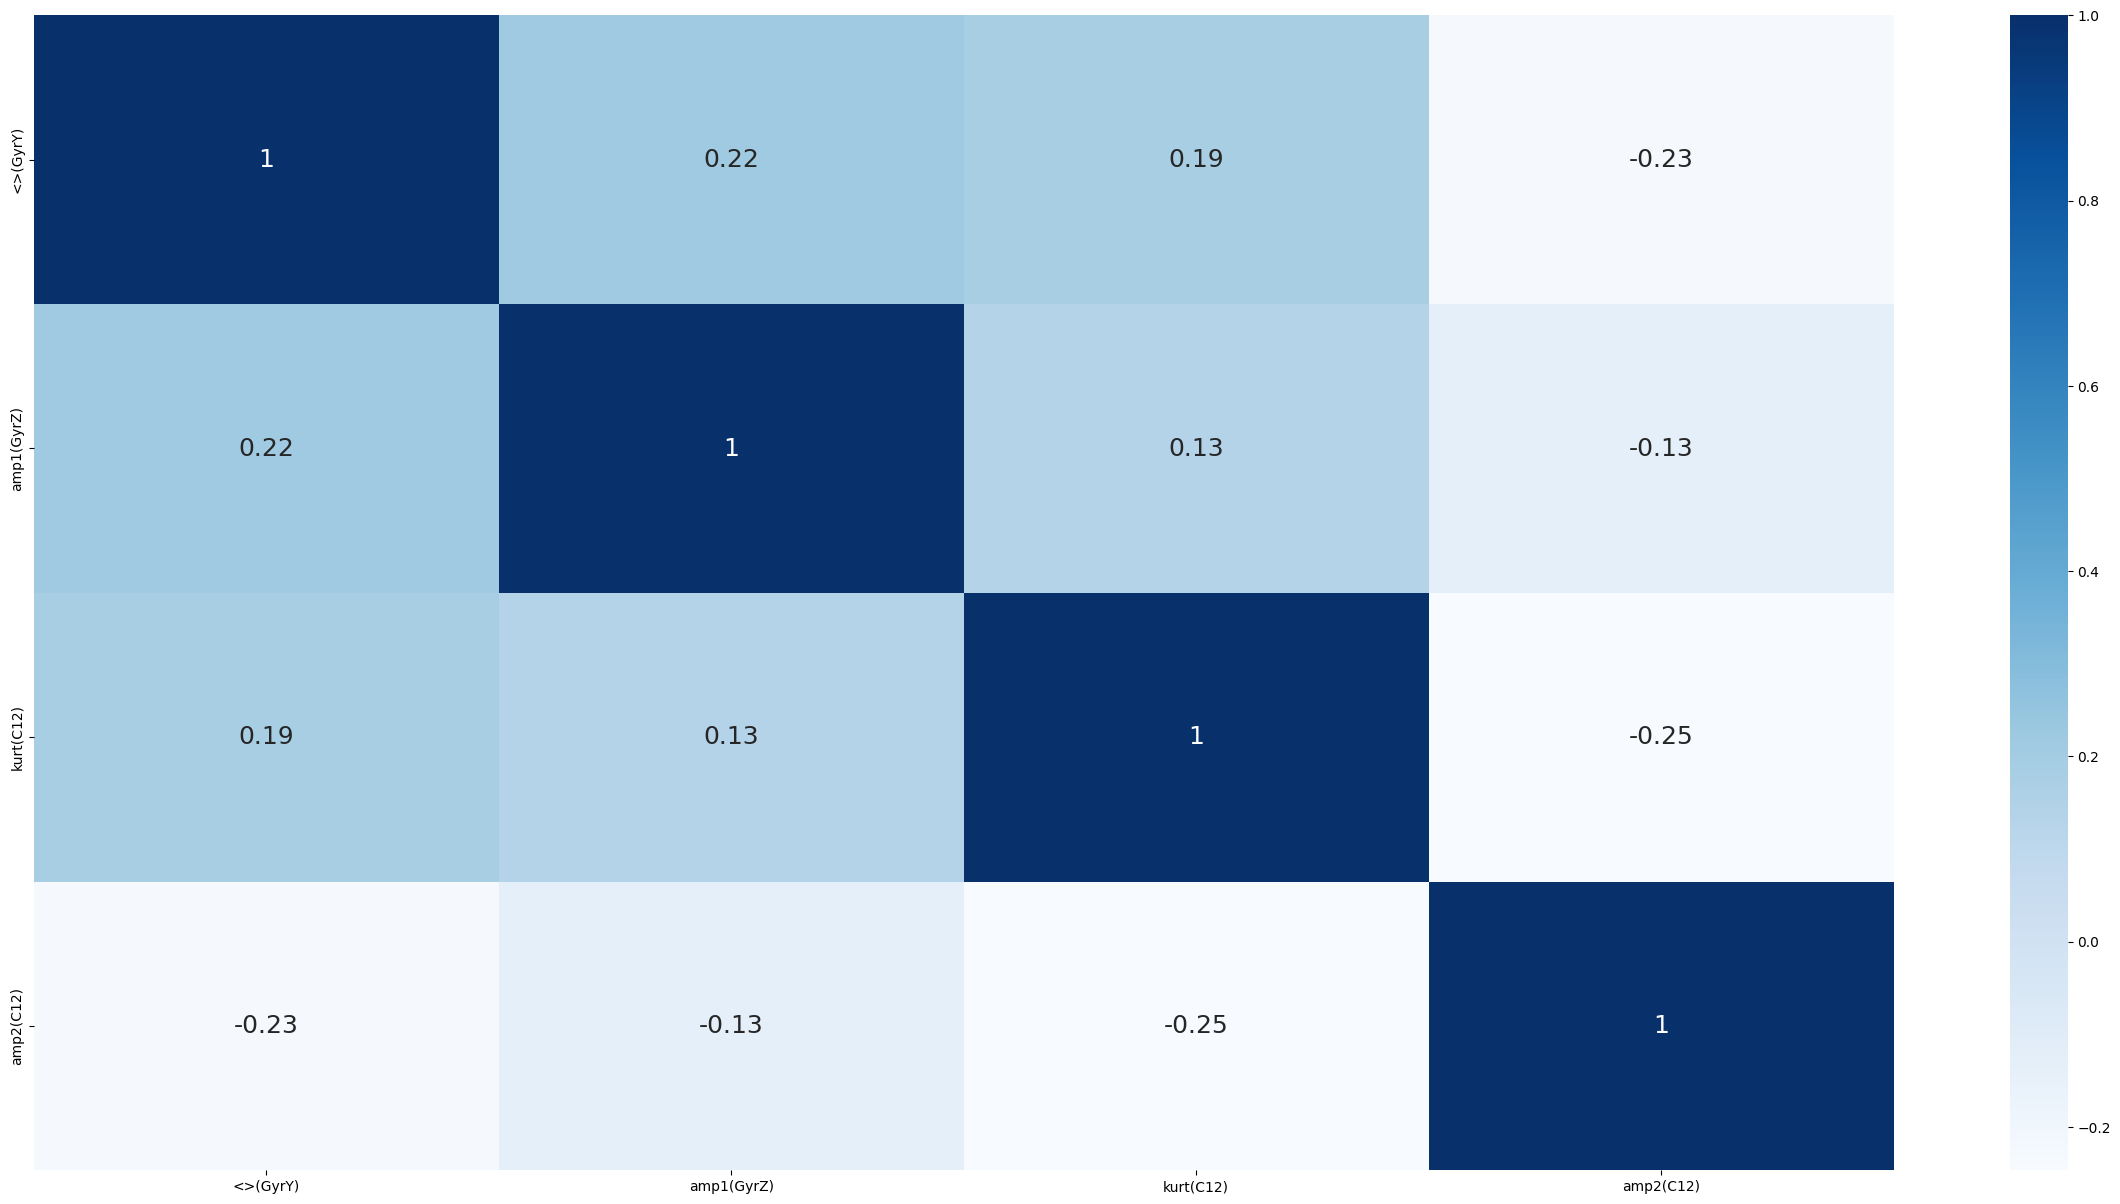

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1078, 4)
(270, 4)
(1078, 1)
(270, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs, criterion="entropy",max_depth=1),
    RandomForestClassifier(n_estimators = 1000,max_depth=1, random_state=rs,bootstrap=False),
    GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis(),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

Cross-Validation: [0.75925926 0.71759259 0.75       0.7627907  0.73023256]
Accuracy: 0.73 	 ---> LogisticRegression 
Test: 0    1
Name: Guasto_test, dtype: int64


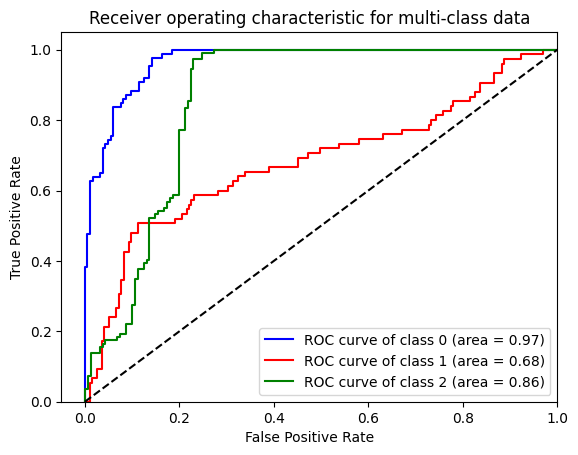

----------------------------------------------------
Cross-Validation: [0.59259259 0.58796296 0.60185185 0.59534884 0.60465116]
Accuracy: 0.57 	 ---> DecisionTreeClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


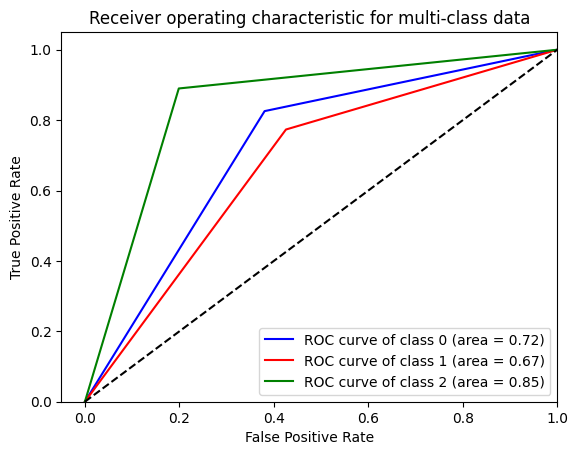

----------------------------------------------------
Cross-Validation: [0.68055556 0.71296296 0.69444444 0.69767442 0.69767442]
Accuracy: 0.71 	 ---> RandomForestClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


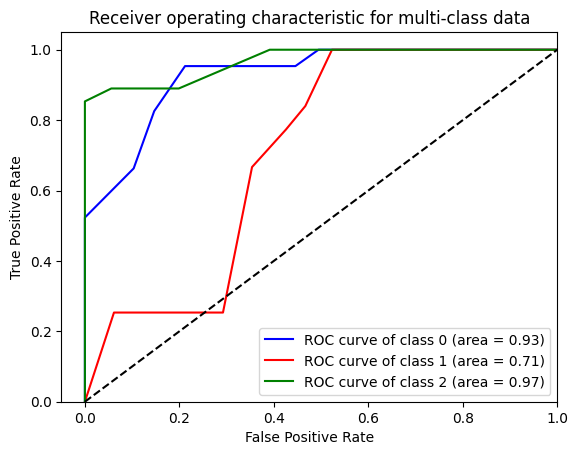

----------------------------------------------------
Cross-Validation: [0.99074074 1.         1.         0.98604651 0.98604651]
Accuracy: 1.0 	 ---> GradientBoostingClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


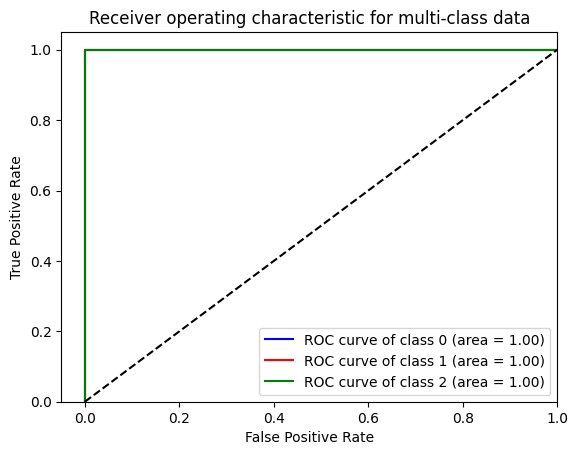

----------------------------------------------------
Cross-Validation: [0.75       0.74074074 0.76388889 0.74418605 0.79534884]
Accuracy: 0.78 	 ---> AdaBoostClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


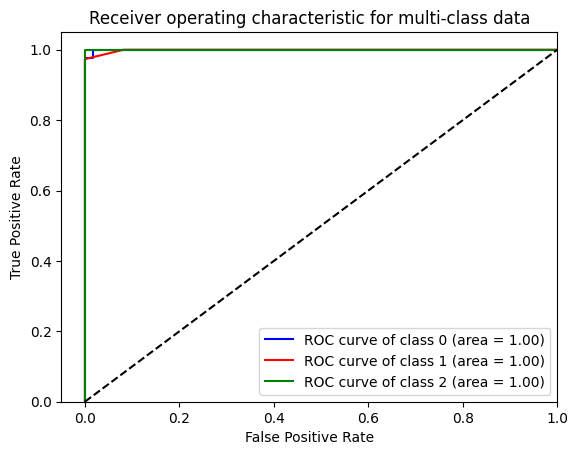

----------------------------------------------------
Cross-Validation: [0.7962963  0.78240741 0.76851852 0.75813953 0.79069767]
Accuracy: 0.8 	 ---> LinearDiscriminantAnalysis 
Test: 0    1
Name: Guasto_test, dtype: int64


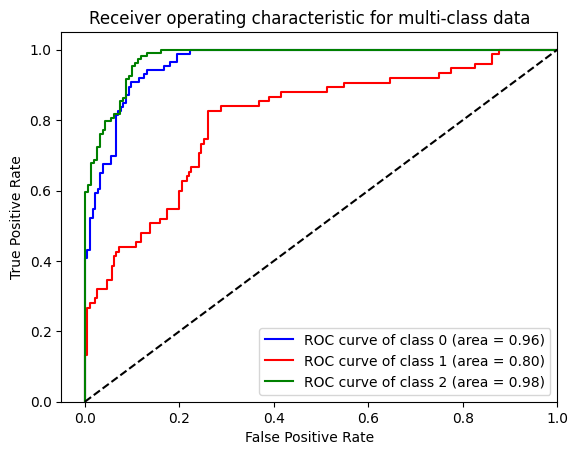

----------------------------------------------------
Cross-Validation: [0.58796296 0.56481481 0.56481481 0.6        0.5627907 ]
Accuracy: 0.63 	 ---> SVC 
Test: 0    1
Name: Guasto_test, dtype: int64


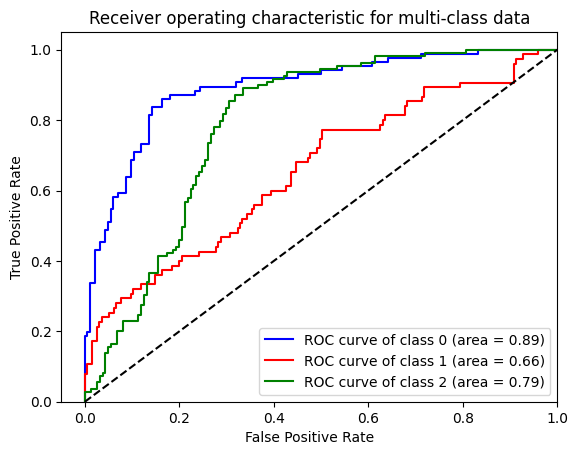

----------------------------------------------------
Cross-Validation: [0.62962963 0.61111111 0.43518519 0.65116279 0.6372093 ]
Accuracy: 0.69 	 ---> MLPClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


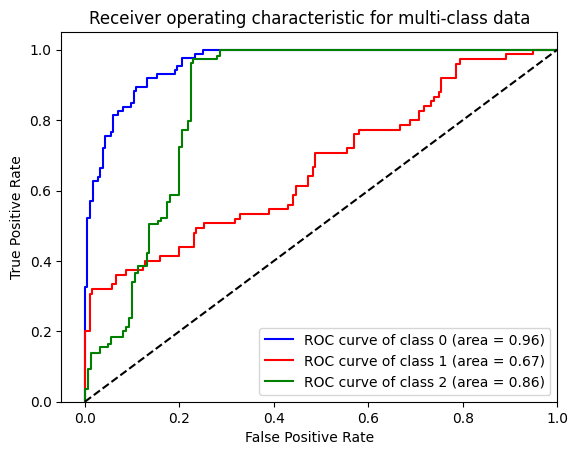

----------------------------------------------------
Cross-Validation: [0.39814815 0.31944444 0.40277778 0.31627907 0.32093023]
Accuracy: 0.27 	 ---> SGDClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


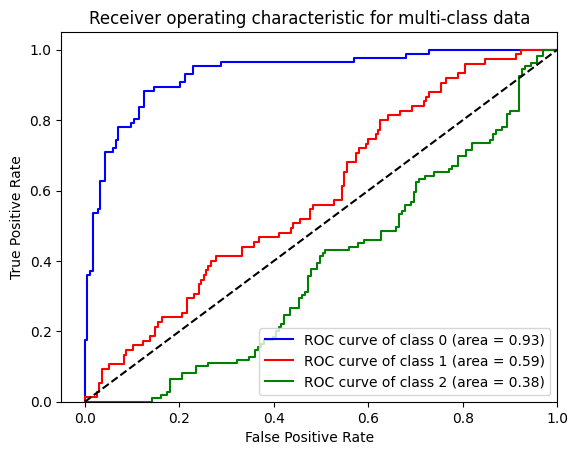

----------------------------------------------------


In [23]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if (j == 1) | (j == 2) |(j == 7):
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)
    else:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)

       

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

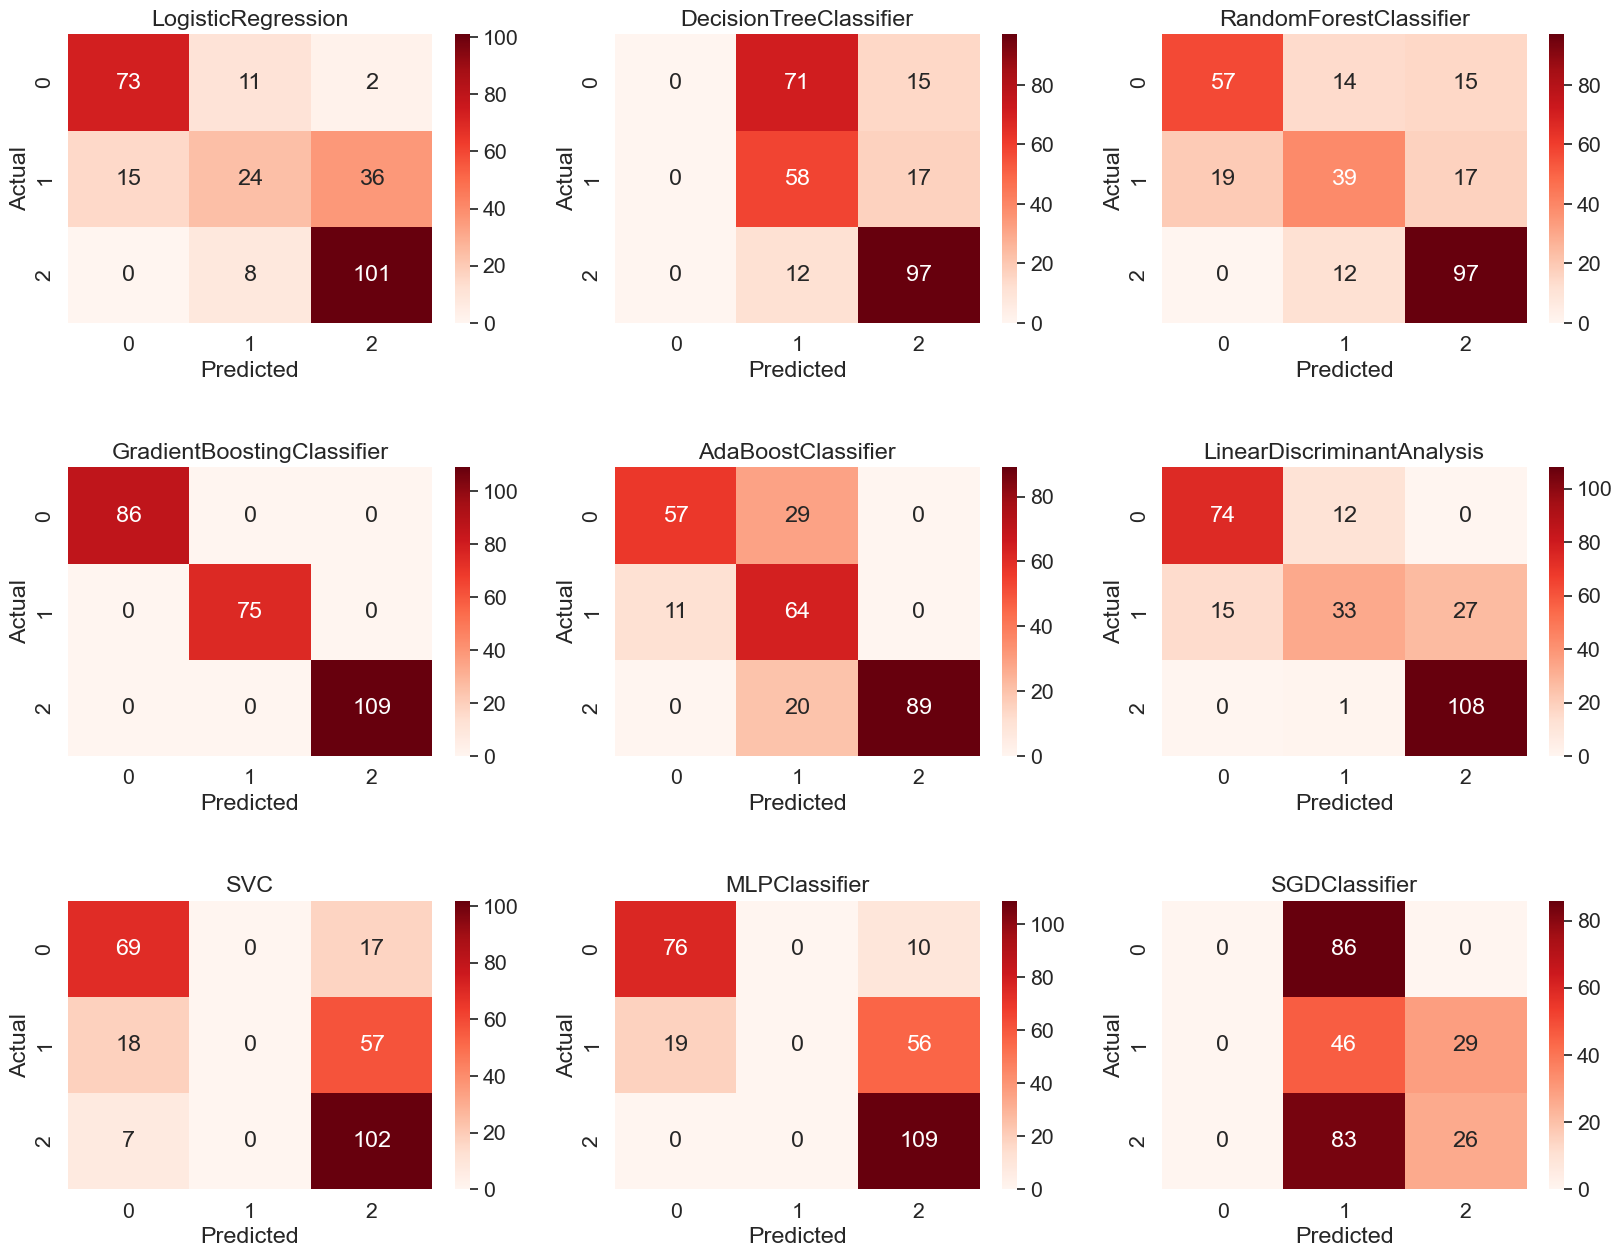

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Scores

Text(0.5, 1.0, 'Cross validation scores')

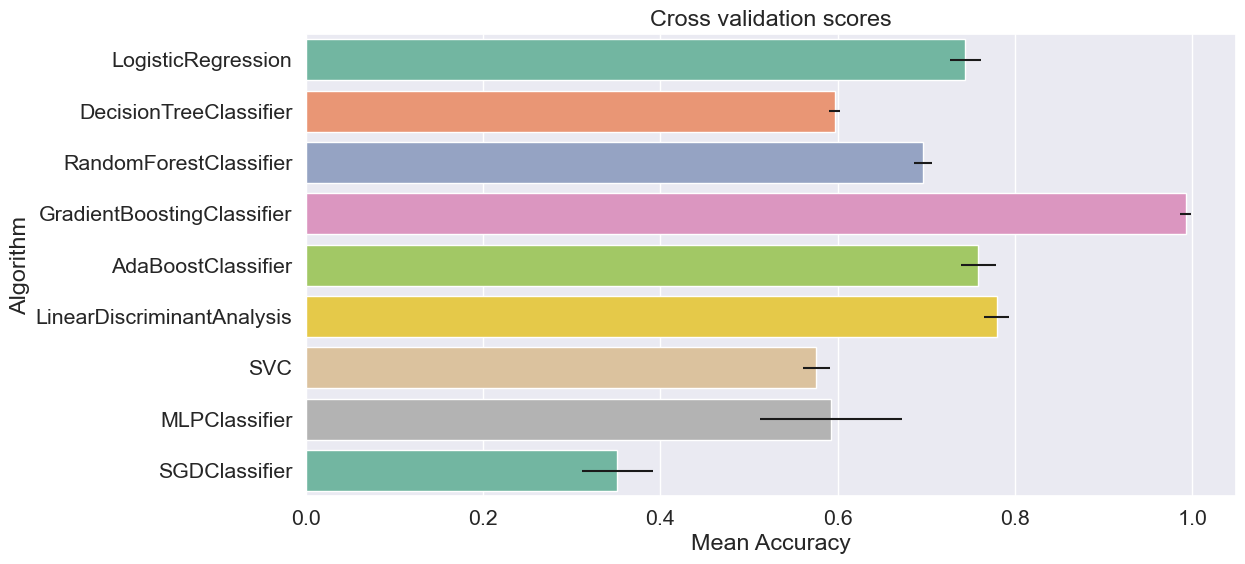

In [25]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [26]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        86
           1       0.56      0.32      0.41        75
           2       0.73      0.93      0.81       109

    accuracy                           0.73       270
   macro avg       0.70      0.70      0.69       270
weighted avg       0.71      0.73      0.71       270

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.41      0.77      0.54        75
           2       0.75      0.89      0.82       109

    accuracy                           0.57       270
   macro avg       0.39      0.55      0.45       270
weighted avg       0.42      0.57      0.48       270

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70      